In [249]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  GridSearchCV ## busqueda selecta de
from sklearn import metrics, model_selection 

from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error ### medidas de funcion de costo mean...
from sklearn.metrics import roc_auc_score

# Modelos de clasificacion:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

# para poder balancear los datos
from imblearn.combine import SMOTETomek 
from collections import Counter

# Reduccion de dimensionalidad:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

# Quitar los warning en el notebook:
warnings.filterwarnings("ignore")

# visualizacion de las columnas (completas)
pd.set_option("display.max_columns", None)

Input variables:
**bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

In [23]:
path = "C:/Users/braya/Desktop/Maestria/Primer semestre/Machine learning/Final/bank-additional/"

In [24]:
df = pd.read_csv(path + "bank-additional-full.csv", sep = ";").fillna(np.nan)
pd.concat([df.head(), df.tail()], axis = 0 )

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [25]:
df.shape

(41188, 21)

## Descriptivos y exploratorios univariados

La base de datos se encontró en un repositorio de estados unidos donde contienen muchas bases de datos que son utilizadas para Machine Learning, en esta ocasión se hace una revisión preliminar de los datos con un resumen en la información, encontrando nulos y el tipo de dato de cada covariable, siguiente a esta revisión se hace un descriptivo de las variables numéricas observando los percentiles los cuales indican la posición o el rango en el que se mueven los datos de cada campo observado dentro de la tabla, posterior a la descripción de las variables cuantitativas se realizan tablas de frecuencia para poder de visualizar a primera vista como se distribuyen los datos, para verlo de mejor manera se decide hacer unos histogramas en donde se evidencia la distribución de los datos y para las categorías se hacen gráficos de barras.

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [26]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [33]:
df['age'].describe() # age

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [29]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [35]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [42]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [50]:
for i in df.columns:
    print(df[i].value_counts())
    print("############################################")

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
############################################
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
############################################
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
############################################
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
############################################
n

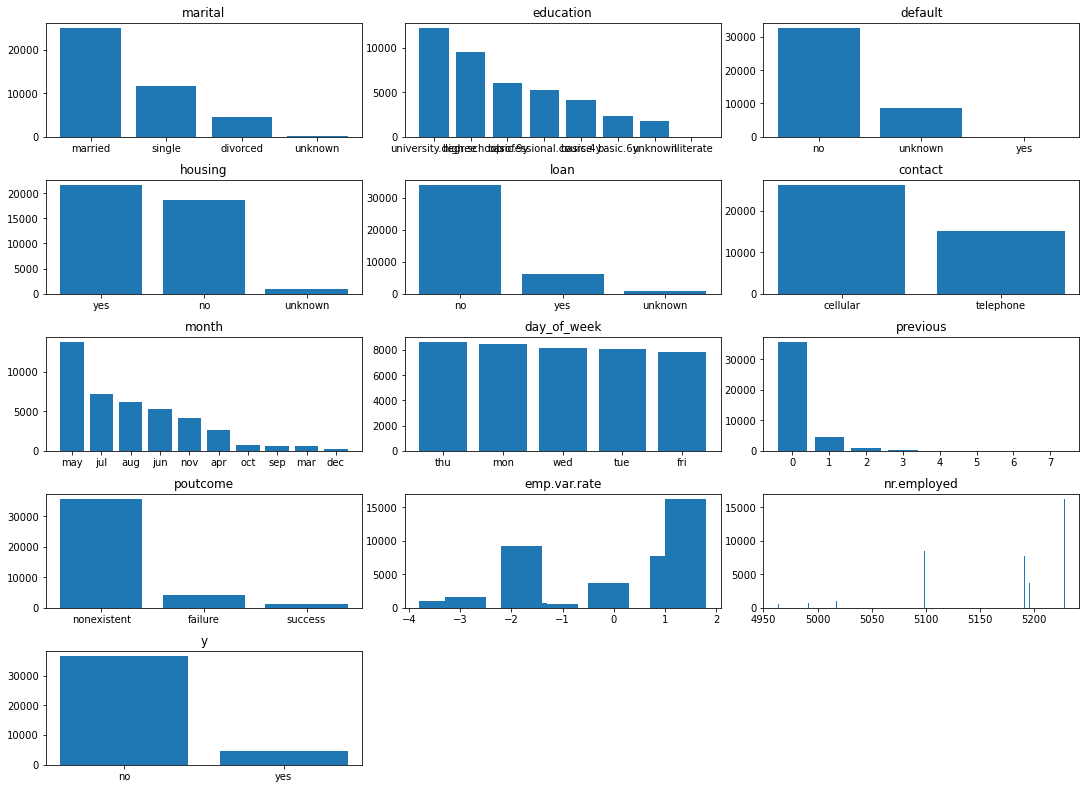

In [101]:
graficar = []
for x in range(len(df.columns)):
    if len(df[df.columns[x]].value_counts()) < 12:
        graficar.append(df.columns[x])

fig = plt.figure(figsize = (15,15))

for i in range(len(graficar)):
    ax = plt.subplot(7,3,i+1)
    ax.bar(df[graficar[i]].value_counts().reset_index().iloc[:,0],df[graficar[i]].value_counts().reset_index().iloc[:,1])
    plt.title(graficar[i])
    plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
#     plt.xticks(rotation = 90)


Lo primero que se puede observar es que la variable respuesta esta desbalanceada y esto puede afectar la clasificacion del modelo.

Lo primero que se puede observar es como estan distribuidas las categorias de las covariables y al final la variable respuesta

In [112]:
df["job"][0]

'housemaid'

## Transformacion de los datos

In [120]:
job_flg = []
for i in range(df.shape[0]):
    if df["job"][i] == "unemployed":
        job_flg.append(1)
    elif df["job"][i] == "blue-collar":
        job_flg.append(2)
    elif df["job"][i] == "unknown":
        job_flg.append(3)
    elif df["job"][i] == "services":
        job_flg.append(4)
    elif df["job"][i] == "entrepreneur":
        job_flg.append(5)
    elif df["job"][i] == "admin.":
        job_flg.append(6)
    elif df["job"][i] == "retired":
        job_flg.append(7)
    elif df["job"][i] == "management":
        job_flg.append(8)
    elif df["job"][i] == "student":
        job_flg.append(9)
    elif df["job"][i] == "technician":
        job_flg.append(10)
    elif df["job"][i] == "self-employed":
        job_flg.append(11)
    elif df["job"][i] == "housemaid":
        job_flg.append(12)
df["job_flg"] = job_flg

In [124]:
marital_flg = []
for i in range(df.shape[0]):
    if df["marital"][i] == "divorced":
        marital_flg.append(1)
    elif df["marital"][i] == "married":
        marital_flg.append(2)
    elif df["marital"][i] == "single":
        marital_flg.append(3)
    elif df["marital"][i] == "unknown":
        marital_flg.append(4)
df["marital_flg"] = marital_flg

In [127]:
education_flg = []
for i in range(df.shape[0]):
    if df["education"][i] == "unknown":
        education_flg.append(1)
    elif df["education"][i] == 'basic.9y':
        education_flg.append(2)
    elif df["education"][i] == 'university.degree':
        education_flg.append(3)
    elif df["education"][i] == 'illiterate':
        education_flg.append(4)
    elif df["education"][i] == 'high.school':
        education_flg.append(5)
    elif df["education"][i] == 'basic.4y':
        education_flg.append(6)
    elif df["education"][i] == 'professional.course':
        education_flg.append(7)
    elif df["education"][i] == 'basic.6y':
        education_flg.append(8)
df["education_flg"] = education_flg

In [130]:
default_flg = []
for i in range(df.shape[0]):
    if df["default"][i] == "no":
        default_flg.append(0)
    elif df["default"][i] == 'unknown':
        default_flg.append(2)
    elif df["default"][i] == 'yes':
        default_flg.append(1)
df["default_flg"] = default_flg

In [133]:
housing_flg = []
for i in range(df.shape[0]):
    if df["housing"][i] == "no":
        housing_flg.append(0)
    elif df["housing"][i] == 'unknown':
        housing_flg.append(2)
    elif df["housing"][i] == 'yes':
        housing_flg.append(1)
df["housing_flg"] = housing_flg

In [136]:
loan_flg = []
for i in range(df.shape[0]):
    if df["loan"][i] == "no":
        loan_flg.append(0)
    elif df["loan"][i] == 'unknown':
        loan_flg.append(2)
    elif df["loan"][i] == 'yes':
        loan_flg.append(1)
df["loan_flg"] = loan_flg

In [139]:
df = pd.get_dummies(df, columns = ["contact"]).drop(columns = ["contact_cellular"])

In [143]:
day_of_week_flg = []
for i in range(df.shape[0]):
    if df["day_of_week"][i] == "fri":
        day_of_week_flg.append(0)
    elif df["day_of_week"][i] == 'thu':
        day_of_week_flg.append(1)
    elif df["day_of_week"][i] == 'wed':
        day_of_week_flg.append(2)
    elif df["day_of_week"][i] == 'mon':
        day_of_week_flg.append(3)
    elif df["day_of_week"][i] == 'tue':
        day_of_week_flg.append(4)
df["day_of_week_flg"] = day_of_week_flg

In [146]:
poutcome_flg = []
for i in range(df.shape[0]):
    if df["poutcome"][i] == "failure":
        poutcome_flg.append(0)
    elif df["poutcome"][i] == 'nonexistent':
        poutcome_flg.append(2)
    elif df["poutcome"][i] == 'success':
        poutcome_flg.append(1)
df["poutcome_flg"] = poutcome_flg

In [149]:
y_flg = []
for i in range(df.shape[0]):
    if df["y"][i] == "no":
        y_flg.append(0)
    elif df["y"][i] == 'yes':
        y_flg.append(1)
df["y_flg"] = y_flg

In [150]:
df.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_flg,marital_flg,education_flg,default_flg,housing_flg,loan_flg,contact_telephone,day_of_week_flg,poutcome_flg,y_flg
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12,2,6,0,0,0,1,3,2,0
1,57,services,married,high.school,unknown,no,no,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4,2,5,2,0,0,1,3,2,0
2,37,services,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4,2,5,0,1,0,1,3,2,0
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6,2,8,0,0,0,1,3,2,0
4,56,services,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4,2,5,0,0,1,1,3,2,0


In [151]:
df1 = df.drop(columns = ["job","marital","education","default","housing","loan","month","day_of_week","poutcome","y"])

In [152]:
df1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_flg,marital_flg,education_flg,default_flg,housing_flg,loan_flg,contact_telephone,day_of_week_flg,poutcome_flg,y_flg
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,12,2,6,0,0,0,1,3,2,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,4,2,5,2,0,0,1,3,2,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,4,2,5,0,1,0,1,3,2,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,6,2,8,0,0,0,1,3,2,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,4,2,5,0,0,1,1,3,2,0


## Analisis multivariado

In [156]:
df1.corr(method = "spearman")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_flg,marital_flg,education_flg,default_flg,housing_flg,loan_flg,contact_telephone,day_of_week_flg,poutcome_flg,y_flg
age,1.000000,-0.002123,0.005715,-0.001062,-0.012643,0.045003,0.044790,0.114536,0.054391,0.044789,0.023249,-0.428000,0.070567,0.192411,-0.003986,-0.006920,0.032814,0.019438,0.013481,-0.011861
duration,-0.002123,1.000000,-0.080953,-0.083072,0.042407,-0.069201,0.002854,-0.008678,-0.078346,-0.095225,-0.012067,0.006252,-0.000849,-0.017035,-0.011444,-0.011864,-0.036420,0.018166,-0.035665,0.348777
campaign,0.005715,-0.080953,1.000000,0.055514,-0.087420,0.156360,0.096494,-0.001554,0.140512,0.144264,-0.002033,-0.010641,0.004948,0.033648,-0.009904,0.012302,0.069625,-0.016775,0.086252,-0.063668
pdays,-0.001062,-0.083072,0.055514,1.000000,-0.509583,0.227698,0.056763,-0.077265,0.278488,0.290673,-0.051543,-0.039152,0.009284,0.080060,-0.009492,0.000820,0.117994,-0.009143,0.438767,-0.324942
previous,-0.012643,0.042407,-0.087420,-0.509583,1.000000,-0.435293,-0.282720,-0.115967,-0.454724,-0.438721,0.029511,0.038240,-0.013582,-0.105347,0.024261,0.000554,-0.242008,-0.006787,-0.995369,0.200914
emp.var.rate,0.045003,-0.069201,0.156360,0.227698,-0.435293,1.000000,0.664890,0.224693,0.939915,0.944702,-0.001834,-0.067614,0.026163,0.177172,-0.046947,0.004263,0.231177,0.018723,0.434387,-0.247480
cons.price.idx,0.044790,0.002854,0.096494,0.056763,-0.282720,0.664890,1.000000,0.245633,0.490970,0.464738,-0.059101,-0.063756,0.022776,0.165031,-0.076501,-0.000038,0.660197,0.001281,0.295985,-0.122187
cons.conf.idx,0.114536,-0.008678,-0.001554,-0.077265,-0.115967,0.224693,0.245633,1.000000,0.236646,0.132707,0.124294,-0.040634,0.007695,0.033047,-0.029552,-0.008452,0.265388,0.026411,0.131024,0.041229
euribor3m,0.054391,-0.078346,0.140512,0.278488,-0.454724,0.939915,0.490970,0.236646,1.000000,0.928857,0.017126,-0.071788,0.026440,0.169480,-0.035303,0.006369,0.140998,-0.001295,0.447649,-0.266822
nr.employed,0.044789,-0.095225,0.144264,0.290673,-0.438721,0.944702,0.464738,0.132707,0.928857,1.000000,-0.000621,-0.071866,0.019917,0.157232,-0.034256,0.003905,0.109497,0.013000,0.428697,-0.283957


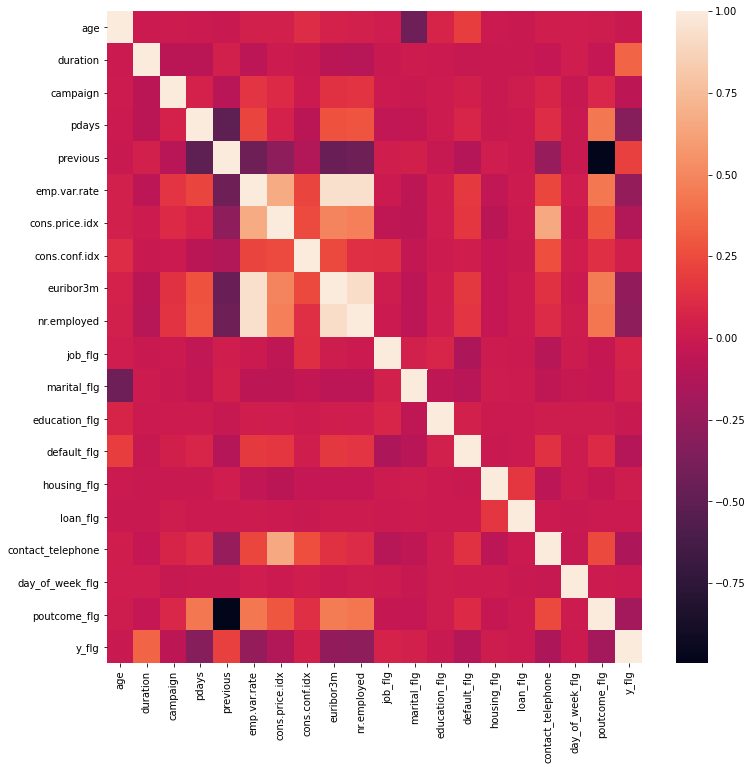

In [160]:
plt.figure(figsize = (12,12))
sns.heatmap(df1.corr(method = "spearman"))

Se encontraron correlaciones demasiado altas en alguna de las covariables, para confirmar esto deberá hacerse una prueba de hipótesis para tener certeza, aun así, se decidió quitar dos covariables para evitar problemas de multicolinealidad.

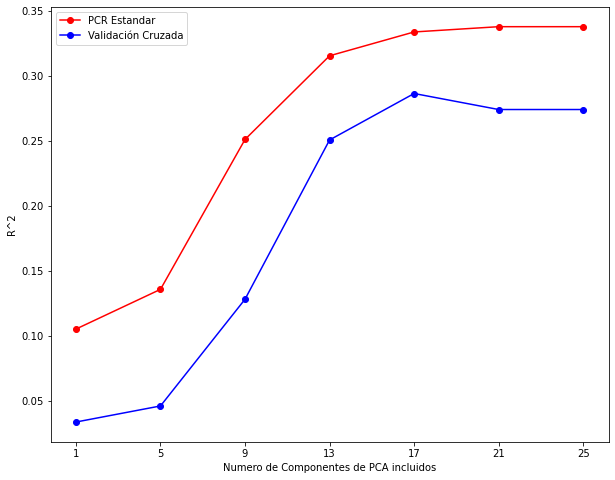

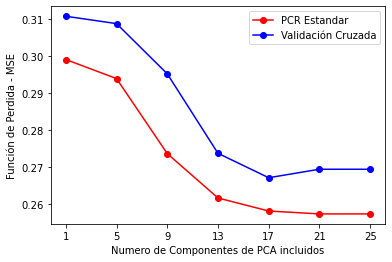

In [254]:
xticks = list(tunning)#.astype('uint8')
plt.figure(figsize =(10,8))
plt.plot(xticks, all_r2_c, '-o', label='PCR Estandar', color='red')
plt.plot(xticks, all_r2_cv, '-o', label='Validación Cruzada', color='blue')
plt.xticks(xticks)
plt.xlabel('Numero de Componentes de PCA incluidos')
plt.ylabel('R^2')
plt.legend()
plt.show()

plt.plot(xticks, all_mse_c, '-o', label='PCR Estandar', color='red')
plt.plot(xticks, all_mse_cv, '-o', label='Validación Cruzada', color='blue')
plt.xticks(xticks)
plt.xlabel('Numero de Componentes de PCA incluidos')
plt.ylabel('Función de Perdida - MSE')
plt.legend()
plt.show()

Se penso en utilizar un reductor de dimensionalidad pero la cantidad de dimensiones es demasiado grande para pensar en una alternativa asi que tendria un alto costo computacional

## Normalizacion de variables

In [165]:
y = df1["y_flg"]
x = df1.drop(columns = ["y_flg"])

In [166]:
sc = StandardScaler()
sc.fit(x)
X = sc.transform(x)

Seleccion aleatoria de las variables

In [172]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.7, random_state = 1234)

In [177]:
x_train.shape

(12356, 19)

In [182]:
modCLass = KNeighborsClassifier()

In [183]:
parametros = {'n_neighbors': np.arange(10,20),
              'p': [1,2]}
acc_scorer = make_scorer(roc_auc_score, greater_is_better = True)

In [184]:
grilla2 = GridSearchCV(estimator = modCLass, param_grid = parametros, scoring = acc_scorer, cv = 5,
                       return_train_score = True, verbose = 1)

In [185]:
modClas_ajust = grilla2.fit(x_train, y_train)
modClas_ajust

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.4min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'p': [1, 2]},
             return_train_score=True, scoring=make_scorer(roc_auc_score),
             verbose=1)

In [186]:
modCLass_best = modClas_ajust.best_estimator_
modCLass_best

KNeighborsClassifier(n_neighbors=13)

In [188]:
y_hat_best = modCLass_best.predict(x_test)
y_hat_best

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [189]:
modClass_MSE = roc_auc_score(y_test, y_hat_best)
modClass_MSE

0.6491956622187917

.

**Quitando las variables con una alta correlacion para ver los resultados**

sin transformar (Estandarizar la variable)

In [190]:
y = df1["y_flg"]
x1 = df1.drop(columns = ["y_flg","nr.employed","emp.var.rate"])

In [191]:
x_train1, x_test1, y_train1, y_test1 = model_selection.train_test_split(x1,y, test_size = 0.7, random_state = 1234)

In [192]:
x_train1.shape

(12356, 17)

In [194]:
modCLass1 = KNeighborsClassifier()

In [195]:
grilla3 = GridSearchCV(estimator = modCLass1, param_grid = parametros, scoring = acc_scorer, cv = 5,
                       return_train_score = True, verbose = 1)

In [196]:
modClas_ajust1 = grilla3.fit(x_train1, y_train1)
modClas_ajust1

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'p': [1, 2]},
             return_train_score=True, scoring=make_scorer(roc_auc_score),
             verbose=1)

In [197]:
modCLass_best1 = modClas_ajust1.best_estimator_
modCLass_best1

KNeighborsClassifier(n_neighbors=11, p=1)

In [198]:
y_hat_best1 = modCLass_best1.predict(x_test1)
y_hat_best1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [199]:
modClass_MSE1 = roc_auc_score(y_test1, y_hat_best1)
modClass_MSE1

0.6820620312671748

### Balanceo de datos

In [204]:
datos = SMOTETomek(n_jobs = 1,random_state = 1234)

x_train_res, y_train_res = datos.fit_sample(x_train, y_train)

In [208]:
print("Distribucion de la muestra antes del remuestreo: {}".format(Counter(y_train)))
print("Distribucion de la muestra despues del remuestreo: {}".format(Counter(y_train_res)))

Distribucion de la muestra antes del remuestreo: Counter({0: 10993, 1: 1363})
Distribucion de la muestra despues del remuestreo: Counter({0: 10975, 1: 10975})


In [210]:
modCLass2 = KNeighborsClassifier()

In [211]:
grilla4 = GridSearchCV(estimator = modCLass2, param_grid = parametros, scoring = acc_scorer, cv = 5,
                       return_train_score = True, verbose = 1)

In [212]:
modClas_ajust2 = grilla4.fit(x_train_res, y_train_res)
modClas_ajust2

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 15.8min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'p': [1, 2]},
             return_train_score=True, scoring=make_scorer(roc_auc_score),
             verbose=1)

In [213]:
modCLass_best2 = modClas_ajust2.best_estimator_
modCLass_best2

KNeighborsClassifier(n_neighbors=10, p=1)

In [215]:
y_hat_best2 = modCLass_best2.predict(x_test)
y_hat_best2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [216]:
modClass_MSE1 = roc_auc_score(y_test1, y_hat_best1)
modClass_MSE1

0.6820620312671748

### arboles de clasificación:

In [218]:
mod_tree = tree.DecisionTreeClassifier(criterion = 'gini')

In [219]:
params = {
    'max_depth': np.arange(1,30),
    'min_samples_leaf':np.arange(2,30),
    'max_features':[3,4,5] 
}

In [220]:
acc_s = make_scorer(roc_auc_score)

In [221]:
grid_o = GridSearchCV(estimator = mod_tree, param_grid = params, scoring = acc_s, cv = 5,
                      return_train_score = True, n_jobs = 2, verbose = 1)

In [222]:
mod1 = grid_o.fit(x_train, y_train)

Fitting 5 folds for each of 2436 candidates, totalling 12180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 210 tasks      | elapsed:   10.0s
[Parallel(n_jobs=2)]: Done 2610 tasks      | elapsed:   29.5s
[Parallel(n_jobs=2)]: Done 6610 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 12180 out of 12180 | elapsed:  2.5min finished


In [223]:
mod1_best = mod1.best_estimator_

In [224]:
res = pd.DataFrame(mod1.cv_results_)
res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_leaf',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

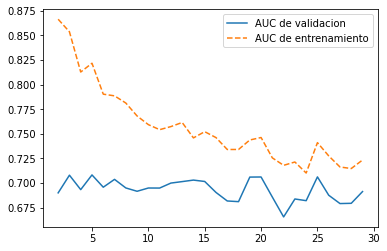

In [226]:
plt.plot(res.param_min_samples_leaf[(res.param_max_features == 4) & (res.param_max_depth == 27)],
    res.mean_test_score[(res.param_max_features == 4) & (res.param_max_depth == 27)], label = 'AUC de validacion')
plt.plot(res.param_min_samples_leaf[(res.param_max_features == 4) & (res.param_max_depth == 27)],
    res.mean_train_score[(res.param_max_features == 4) & (res.param_max_depth == 27)], '--',label = 'AUC de entrenamiento')
plt.legend()
plt.show()

In [227]:
y_hat2 = mod1.predict(x_test)

In [228]:
roc_auc_score(y_test, y_hat2)

0.7325369115671758

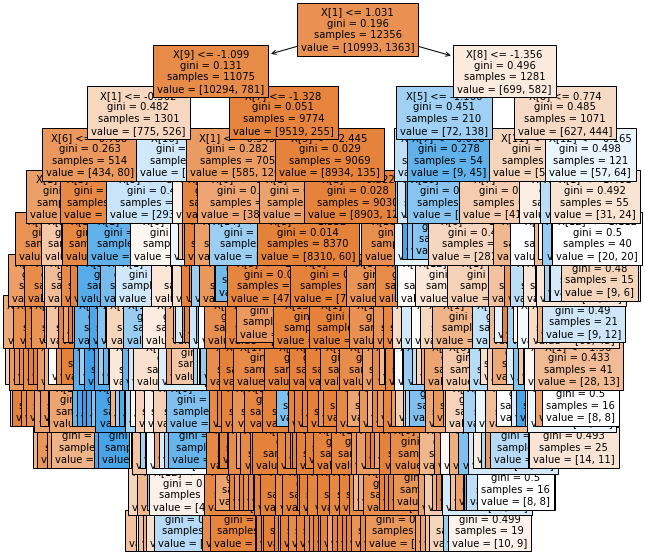

In [230]:
plt.figure(figsize = (10,10))
tree.plot_tree(mod1_best, filled = True, fontsize = 10)
plt.show()

**Modelo con datos estandarizados**

In [231]:
mod_tree1 = tree.DecisionTreeClassifier(criterion = 'gini')

In [232]:
grid_o1 = GridSearchCV(estimator = mod_tree1, param_grid = params, scoring = acc_s, cv = 5,
                      return_train_score = True, n_jobs = 2, verbose = 1)

In [234]:
mod2 = grid_o1.fit(x_train1, y_train1)

Fitting 5 folds for each of 2436 candidates, totalling 12180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 188 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done 1388 tasks      | elapsed:   20.0s
[Parallel(n_jobs=2)]: Done 3388 tasks      | elapsed:   50.5s
[Parallel(n_jobs=2)]: Done 6188 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 9788 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done 12180 out of 12180 | elapsed:  3.5min finished


In [235]:
mod1_best1 = mod2.best_estimator_
mod1_best1

In [236]:
res1 = pd.DataFrame(mod2.cv_results_)

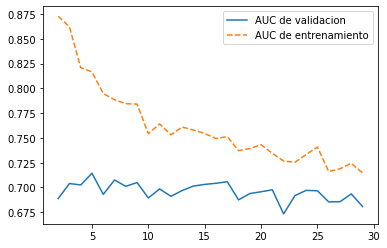

In [237]:
plt.plot(res1.param_min_samples_leaf[(res1.param_max_features == 4) & (res1.param_max_depth == 27)],
    res1.mean_test_score[(res1.param_max_features == 4) & (res1.param_max_depth == 27)], label = 'AUC de validacion')
plt.plot(res1.param_min_samples_leaf[(res1.param_max_features == 4) & (res1.param_max_depth == 27)],
    res1.mean_train_score[(res1.param_max_features == 4) & (res1.param_max_depth == 27)], '--',label = 'AUC de entrenamiento')
plt.legend()
plt.show()

In [238]:
y_hat3 = mod2.predict(x_test1)
roc_auc_score(y_test1, y_hat3)

0.7270470262641139

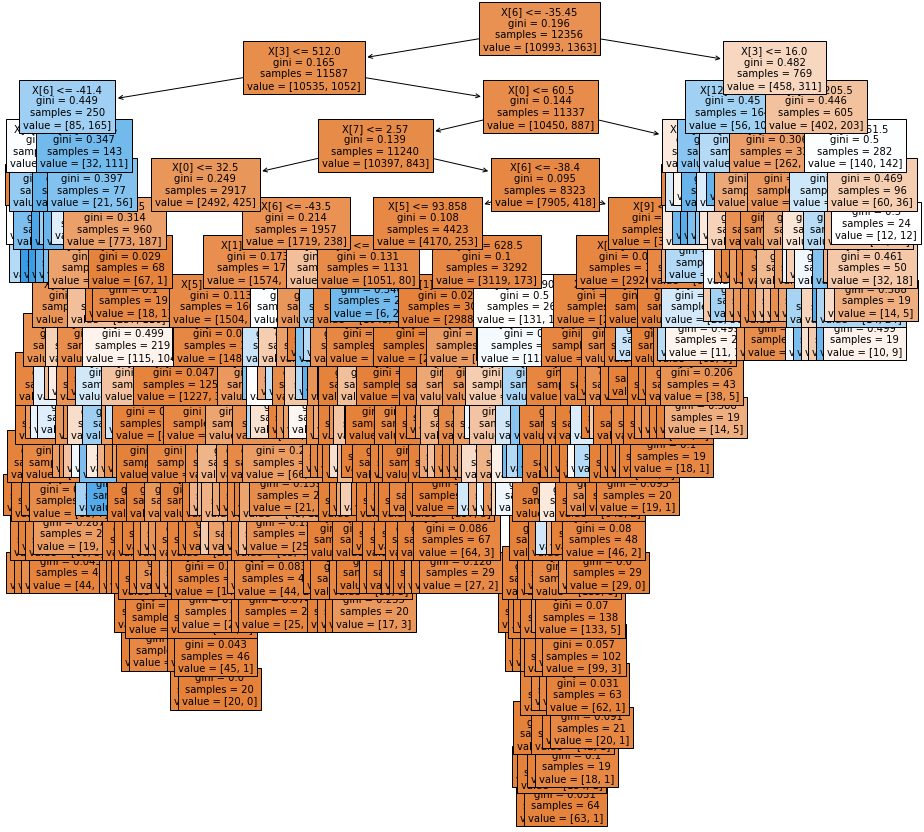

In [239]:
plt.figure(figsize = (15,15))
tree.plot_tree(mod1_best1, filled = True, fontsize = 10)
plt.show()

**Evaluacion con datos balanceados**

In [240]:
mod_tree2 = tree.DecisionTreeClassifier(criterion = 'gini')

In [241]:
grid_o2 = GridSearchCV(estimator = mod_tree2, param_grid = params, scoring = acc_s, cv = 5,
                      return_train_score = True, n_jobs = 2, verbose = 1)

In [242]:
mod3 = grid_o2.fit(x_train_res, y_train_res)

Fitting 5 folds for each of 2436 candidates, totalling 12180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 174 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 1374 tasks      | elapsed:   21.4s
[Parallel(n_jobs=2)]: Done 3374 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 6174 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 8730 tasks      | elapsed:  4.2min
[Parallel(n_jobs=2)]: Done 9830 tasks      | elapsed:  5.0min
[Parallel(n_jobs=2)]: Done 11130 tasks      | elapsed:  5.7min
[Parallel(n_jobs=2)]: Done 12180 out of 12180 | elapsed:  6.3min finished


In [243]:
mod1_best2 = mod3.best_estimator_
mod1_best2

DecisionTreeClassifier(max_depth=15, max_features=5, min_samples_leaf=3)

In [244]:
res2 = pd.DataFrame(mod3.cv_results_)

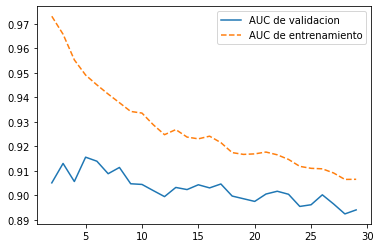

In [245]:
plt.plot(res2.param_min_samples_leaf[(res2.param_max_features == 4) & (res2.param_max_depth == 27)],
    res2.mean_test_score[(res2.param_max_features == 4) & (res2.param_max_depth == 27)], label = 'AUC de validacion')
plt.plot(res2.param_min_samples_leaf[(res2.param_max_features == 4) & (res2.param_max_depth == 27)],
    res2.mean_train_score[(res2.param_max_features == 4) & (res2.param_max_depth == 27)], '--',label = 'AUC de entrenamiento')
plt.legend()
plt.show()

In [246]:
y_hat4 = mod3.predict(x_test)
roc_auc_score(y_test, y_hat4)

0.7777308415966878

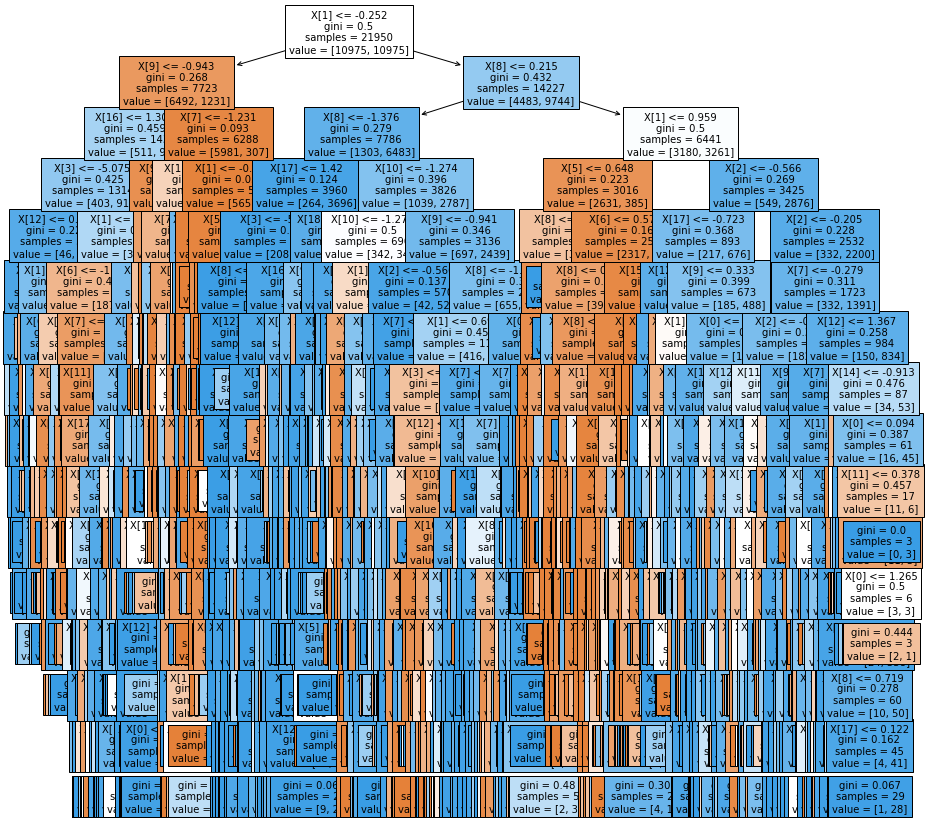

In [247]:
plt.figure(figsize = (15,15))
tree.plot_tree(mod1_best2, filled = True, fontsize = 10)
plt.show()

## Conclusiones de los modelos:

Se realizaron distintas pruebas con algunos modelos de clasificación variando los tipo de datos, estandarizaciones, balanceo y ajustando la cantidad de covariables ingresadas y los resultados dentro de los modelos fue muy buena a lo que se esperaba, los primeros modelos ocupados tuvieron como resultado un intervalo entre 0.61 y 0.68 de resultado en la curva roc sabiendo que entre mas cercano a uno el modelo es mejor, estos resultados fueron muy buenos, aun así se intento con unos árboles de clasificación con la misma variación en sus covariables se mejoraron las métricas de rendimiento teniendo como intervalo 0.73 a  0.78 de resultado en las métricas de rendimiento.

Rta: 0.7777308415966878

Este es el mejor modelo encontrado para la clasificacion de los datos, es un arbol de clasificacion con los datos balanceados

